In [70]:
# import numpy as np
# import pandas as pd
# from IPython import get_ipython
# from IPython.display import display

from graphviz import Digraph
from IPython.display import Image
import numpy as np
import pandas as pd

In [71]:
# def importdata():
#     return pd.read_csv("PlayTennis.csv")
#     data = importdata()


# data=pd.read_csv('PlayTennis.csv')

data = pd.read_csv('PlayTennis.csv')
data["target"] = data['play']

In [72]:
# def importdata():
#     return pd.read_csv("PlayTennis.csv")
#     data = importdata()

print("Dataset Length: ", len(data))
print("Dataset Shape: ", data.shape)
data["target"] = data['play']

Dataset Length:  14
Dataset Shape:  (14, 6)


In [73]:
# def entropy(target_col):
#     elements,counts = np.unique(target_col,return_counts = True)
#     entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
#     return entropy
# data = importdata()
# entropy(data['PlayTennis.csv'])

In [74]:
# Function to calculate entropy


# def Entropy(data):
#   d=data.iloc[:,-1]
#   d=d.value_counts()
#   s=0
#   for v in d.keys():
#     s+=(-d[v]/len(data))*np.log2(d[v]/len(data))
#   return s
def Entropy(data):
    d = data.iloc[:, -1]
    d = d.value_counts()
    s = 0
    for v in d.keys():
        s += (-d[v] / len(data)) * np.log2(d[v] / len(data))
    return s

In [75]:
total_entropy = Entropy(data)
print(f"Total Entropy: {total_entropy}")

Total Entropy: 0.9402859586706311


In [76]:
def values(attr):
  l=[]
  for x in attr:
    if x not in l:
      l.append(x)
  return l

In [77]:
def IG(data, attr):
    Es = Entropy(data)
    val = values(data[attr])
    s_c = data[attr].value_counts()
    s_v = []

    for v in val:
        ds = data[data[attr] == v]
        s = 0
        for res in values(data.iloc[:, -1]):
            try:
                pi = ds.iloc[:, -1].value_counts()[res] / len(ds)
                s -= (pi) * np.log2(pi)
            except:
                s = 0
        s_v.append(s)

    # Calculate information gain
    for i in range(len(val)):
        Es -= (s_c[val[i]] * s_v[i] / sum(s_c))

    return Es

In [78]:
def values(attr):
    return list(set(attr))

In [79]:
def DTClassifier(data, features):
    # Base cases: pure leaf node or no features left
    if len(np.unique(data.iloc[:, -1])) == 1:
        return np.unique(data.iloc[:, -1])[0]
    elif len(data) == 0 or len(features) == 0:
        return np.unique(data.iloc[:, -1])[np.argmax(np.unique(data.iloc[:, -1], return_counts=True)[1])]

    # Recursive case: pick the best feature
    item_values = [IG(data, feature) for feature in features]
    best_feature_index = np.argmax(item_values)
    best_feature = features[best_feature_index]

    # Create tree root with the best feature
    tree = {best_feature: {}}
    features = [i for i in features if i != best_feature]  # Exclude this feature

    # Recursively create subtrees for each value of the best feature
    for value in np.unique(data[best_feature]):
        sub_data = data.where(data[best_feature] == value).dropna()
        subtree = DTClassifier(sub_data, features)
        tree[best_feature][value] = subtree

    return tree

In [80]:
# Create and visualize the decision tree
def visualize_tree(tree, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()

    # Recursively visualize each node of the tree
    if isinstance(tree, dict):
        node_label = list(tree.keys())[0]
        graph.node(str(node_id), node_label)

        for value, subtree in tree[node_label].items():
            new_node_id = node_id + len(graph.body)
            graph.edge(str(node_id), str(new_node_id), label=str(value))
            visualize_tree(subtree, graph, new_node_id)
    else:
        graph.node(str(node_id), str(tree))  # Leaf node

    return graph

In [81]:
# Assuming DT_dict is the output of DTClassifier
features_used = list(data.columns[:-1])  # All columns except target
tree = DTClassifier(data, features_used)

In [82]:
graph = visualize_tree(tree)

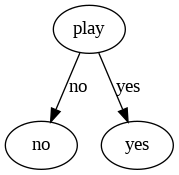

In [83]:
# Render and display the final tree
graph.render('full_decision_tree', format='png')
display(Image('full_decision_tree.png'))

In [84]:
# print(values(data['outlook']))
# # Calculate the entropy of the target variable
# # total_entropy = Entropy(data)
# # print(f"Total Entropy: {total_entropy}")



# # Calculate the IG for each attribute

# # for attr in data.columns[:-1]:
# #   ig = IG(data, attr)
# #   print(f"IG for {attr}: {ig}")

['rainy', 'overcast', 'sunny']


In [85]:
# class Node():
#     def init(self, name=None, attr=None):
#         self.name = name
#         self.attr = attr

#     def call_(self):
#         return self.name


# def DTNode(data, features_used):
#     node = Node()
#     IGmax = 0
#     v_best = None
#     val_list = [v for v in data.columns[:-1] if v not in features_used]

#     if val_list != []:
#         for v in val_list:
#             ig = IG(data, v)
#             if ig > IGmax:
#                 IGmax = ig
#                 v_best = v

#         if v_best:
#             features_used.append(v_best)
#             node.name = v_best
#             node.attr = data[v_best].unique()
#             return node
#         else:
#             return None

#     return None


# def DTClassifier(data, features_used):
#     root = DTNode(data, features_used)
#     DT_dict = {}

#     if root is not None:
#         item = []
#         for attr in root.attr:
#             dataN = data[data[root.name] == attr]
#             if Entropy(dataN) == 0:
#                 item.append((attr, dataN.iloc[:, -1].unique()[0]))
#             else:
#                 dt = DTClassifier(dataN, features_used)
#                 item.append((attr, dt))

#         DT_dict[root.name] = item

#     return DT_dict


In [86]:
# from graphviz import Digraph

# def visualize_tree(tree, graph=None):
#   if graph is None:
#     graph = Digraph()
#   node_id = str(id(tree))
#   if type(tree) == dict:
#     graph.node(node_id, list(tree.keys())[0])
#     for edge, subtree in list(tree.values())[0]:
#       child_id = visualize_tree(subtree, graph)
#       graph.edge(node_id, child_id, label=str(edge))
#   else:
#     graph.node(node_id, str(tree))
#   return node_id

# # Assuming DT_dict is the output of DTClassifier
# features_used = []
# tree = DTClassifier(data, features_used)
# graph = visualize_tree(tree)
# display(graph)

In [87]:
# from graphviz import Digraph
# from IPython.display import Image

# def visualize_tree(tree, graph=None, node_id=0):
#     if graph is None:
#         graph = Digraph()

#     # Each node should have a unique identifier
#     node_label = str(tree)
#     graph.node(str(node_id), node_label)

#     # Recursively visualize left and right branches (if they exist)
#     if isinstance(tree, dict):
#         for branch in tree:
#             new_node_id = node_id + 1
#             graph.edge(str(node_id), str(new_node_id), label=branch)
#             visualize_tree(tree[branch], graph, new_node_id)

#     return graph

# # Assuming DT_dict is the output of DTClassifier
# features_used = []
# tree = DTClassifier(data, features_used)
# graph = visualize_tree(tree)

# # Render and display the graph
# graph.render('graph', format='png')
# display(Image('graph.png'))